In [93]:
from scipy.stats import kurtosis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
my_random_state = 318
import time
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, normalize
from sklearn.metrics import accuracy_score,plot_confusion_matrix, confusion_matrix

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.random_projection import GaussianRandomProjection as RP

clusterings = ['KMeans','EM']
dimReductions = ['PCA','ICA', 'RP', 'IG']

# data import and preprocessing


In [94]:
##### Adult Income
### http://archive.ics.uci.edu/ml/datasets/Adult
data = pd.read_csv('datafiles/adult.csv')
data

y_data_raw = data.income

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_data_raw.values.tolist())
y_data = le.transform(y_data_raw)


x_data_raw = data.loc[:,'age':'native-country']

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(x_data_raw.values.tolist())
x_data = enc.transform(x_data_raw)


# x_data = normalize(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7, random_state=my_random_state, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(22792, 14) (9769, 14) (22792,) (9769,)


In [95]:
x_data

array([[2.2000e+01, 7.0000e+00, 2.6710e+03, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       [3.3000e+01, 6.0000e+00, 2.9260e+03, ..., 0.0000e+00, 1.2000e+01,
        3.9000e+01],
       [2.1000e+01, 4.0000e+00, 1.4086e+04, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       ...,
       [4.1000e+01, 4.0000e+00, 7.8830e+03, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       [5.0000e+00, 4.0000e+00, 1.2881e+04, ..., 0.0000e+00, 1.9000e+01,
        3.9000e+01],
       [3.5000e+01, 5.0000e+00, 1.7825e+04, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01]])

In [96]:
y_data_raw

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

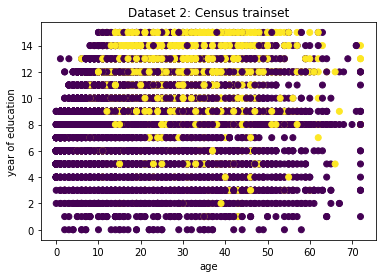

In [97]:
plt.scatter(x_train[:,0],x_train[:,4], c=y_train, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset')
plt.xlabel('age')
plt.ylabel('year of education')
# plt.ylabel('fnlwgt')
plt.savefig(f'part2/census.png')
plt.show()

In [98]:
y_test.tolist().count(0)

7377

In [99]:
y_test.tolist().count(1)

2392

# modify thisDR!!!

# modify DR function handle:

from sklearn.decomposition import PCA, FastICA, NMF

from sklearn.random_projection import GaussianRandomProjection as RP

In [100]:
thisDR = 'PCA' 
# 'initial' if no DR. Skip section 1 

# x_train_transform = x_train # default for 'initial'
# x_test_transform = x_test # default for 'initial'

# 1. Dimensionality Reduction

In [101]:
################################
DR = PCA(#n_components = 16,
         random_state = my_random_state)

tic = time.perf_counter() 
DR.fit(normalize(x_train))
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"Dimensionality Reduction Algorithm training time {toc - tic} seconds")
print()

Dimensionality Reduction Algorithm training time 0.010511700000279234 seconds



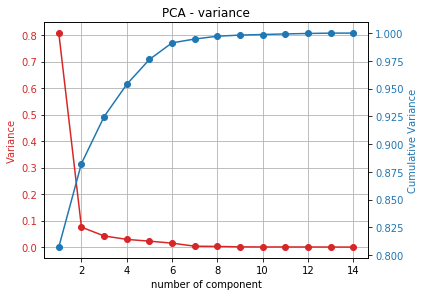

In [102]:
# https://matplotlib.org/gallery/api/two_scales.html

fig, ax1 = plt.subplots()
plt.grid()

color1 = 'tab:red'
ax1.set_xlabel('number of component')
ax1.set_ylabel('Variance', color=color1)
ax1.plot(np.arange(1, DR.explained_variance_ratio_.size + 1), DR.explained_variance_ratio_, marker='o', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('Cumulative Variance', color=color2)  # we already handled the x-label with ax1
ax2.plot(np.arange(1, DR.explained_variance_ratio_.size + 1), np.cumsum(DR.explained_variance_ratio_), marker = 'o', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped


plt.title(f'{thisDR} - variance')
plt.savefig(f'part2/{thisDR}_variance.png')
plt.show()

In [45]:
DR.explained_variance_ratio_

array([8.07289536e-01, 7.52635410e-02, 4.22024512e-02, 2.90833742e-02,
       2.24185174e-02, 1.49561401e-02, 3.43422209e-03, 2.53763920e-03,
       1.01834098e-03, 5.19041890e-04, 5.10992039e-04, 4.38004592e-04,
       3.03440694e-04, 2.47584062e-05])

In [104]:

best_n_components = 2
bestDR = PCA(n_components=best_n_components, random_state = my_random_state)
x_train_transform = bestDR.fit_transform(normalize(x_train))
x_test_transform = bestDR.fit_transform(normalize(x_test))
x_train_inverse = bestDR.inverse_transform(x_train_transform)

# Reconstruction Error
mse = np.sum(np.square(x_train - x_train_inverse))/x_train_inverse.size
print('MSE: ', mse)
#  MSE: 5.000467600786047e-05 for n=2

MSE:  10540592.079931548


In [105]:
x_train_transform

array([[-0.01310756,  0.00141584],
       [-0.00747975, -0.00064147],
       [-0.01131238,  0.00075018],
       ...,
       [ 0.01216647, -0.00764443],
       [-0.01033718,  0.00043032],
       [-0.01064066,  0.00056057]])

In [106]:
x_train_inverse

array([[2.41394794e-03, 4.54860202e-04, 1.00210058e+00, ...,
        3.12356810e-04, 4.65722080e-03, 4.46071046e-03],
       [4.52044730e-03, 8.03386769e-04, 1.00049055e+00, ...,
        4.02146956e-04, 8.33422015e-03, 7.88708449e-03],
       [3.08710704e-03, 5.66244141e-04, 1.00159205e+00, ...,
        3.41138823e-04, 5.83229447e-03, 5.55576766e-03],
       ...,
       [1.18508896e-02, 2.01608252e-03, 9.94774208e-01, ...,
        7.12928978e-04, 2.11290923e-02, 1.98083934e-02],
       [3.44738317e-03, 6.25822655e-04, 1.00129343e+00, ...,
        3.56151630e-04, 6.46101478e-03, 6.14133502e-03],
       [3.33128935e-03, 6.06598659e-04, 1.00136991e+00, ...,
        3.51021839e-04, 6.25828318e-03, 5.95226405e-03]])

# 2. after dimensional reduction: KMeans

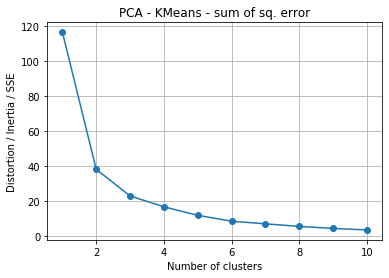

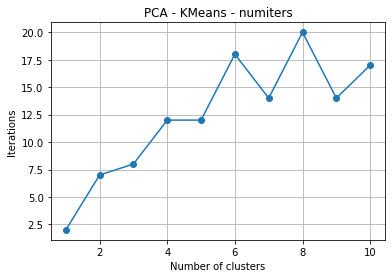

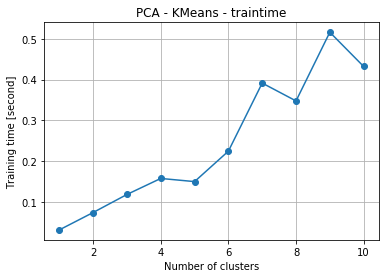

In [107]:
thisClust = 'KMeans'
# calculate distortion for a range of number of cluster
distortions = []
numiters = []
traintime = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=my_random_state)
    
    tic = time.perf_counter() 
    km.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    
    distortions.append(km.inertia_)
    numiters.append(km.n_iter_)

# plot
plt.figure()
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion / Inertia / SSE')
plt.title(f'{thisDR} - {thisClust} - sum of sq. error')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_distortion.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 11), numiters, marker='o')
plt.title(f'{thisDR} - {thisClust} - numiters')
plt.xlabel('Number of clusters')
plt.ylabel('Iterations')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 11), traintime, marker='o')
plt.title(f'{thisDR} - {thisClust} - traintime')
plt.xlabel('Number of clusters')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_traintime.png')
plt.show()

## KMeans n=2
### compare with original labeling

In [108]:
km2 = KMeans(n_clusters = 2, random_state = my_random_state)


tic = time.perf_counter() 
km2.fit(x_train_transform)
toc = time.perf_counter() 
print(f"training time {toc - tic} seconds")
print()

print(km2.cluster_centers_)
print(km2.labels_)
print(km2.inertia_)
print(km2.n_iter_)

training time 0.08194759999969392 seconds

[[-4.61864020e-03 -1.05312578e-04]
 [ 7.41963256e-01  1.69179802e-02]]
[0 0 0 ... 0 0 0]
38.20014171683562
7


In [109]:
km2.labels_.tolist().count(1)

141

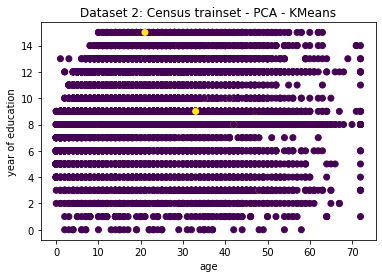

In [110]:

plt.scatter(x_train[:,0],x_train[:,4], c=km2.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

[[17243   100]
 [ 5408    41]]
Prediction accuracy on train set: 0.7583362583362583


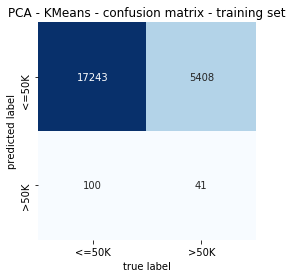

In [112]:
species = ['<=50K','>50K']

y_train_km2 = []
for l in km2.labels_:
    y_train_km2.append(species[l])
    
train_confmat_km2 = confusion_matrix(y_train, km2.labels_)
train_accu_km2 = accuracy_score(y_train, km2.labels_)
print(train_confmat_km2)
print(f"Prediction accuracy on train set: {train_accu_km2}")


import seaborn as sns
# species.reverse() # for plotting
sns.heatmap(train_confmat_km2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - training set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_train.png')

In [113]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km2.inertia_)
score = silhouette_score(x_train_transform, km2.labels_)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(y_train, km2.labels_)
# ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_km2)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  38.20014171683562
Silhouette score:  0.9724263397666261
Adjusted Mutual Information (AMI) score:  7.380305344604658e-05


In [114]:
tic = time.perf_counter() 
y_test_predict2 = km2.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()
y_test_predict2

testing time 0.001776999999947293 seconds



array([0, 0, 0, ..., 0, 0, 0])

In [115]:
y_test_predict2.tolist().count(0)

9694

[[7326   51]
 [2368   24]]
Prediction accuracy on test set: 0.752379977479783


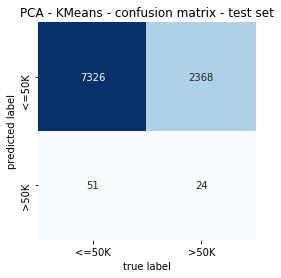

In [116]:

species = ['<=50K','>50K']
y_test_km2 = []
for pred in y_test_predict2:
    y_test_km2.append(species[pred])
    
# print(f"Prediction accuracy on test set: {accuracy_score(le.inverse_transform(y_test),y_test_km)}")
# # best_test_accuracy[0] = accuracy_score(y_test,y_test_dt)


test_confmat_km2 = confusion_matrix(y_test, y_test_predict2)
test_accu_km2 = accuracy_score(y_test, y_test_predict2)
print(test_confmat_km2)
print(f"Prediction accuracy on test set: {test_accu_km2}")


# species.reverse() # for plotting
sns.heatmap(test_confmat_km2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - test set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_test.png')



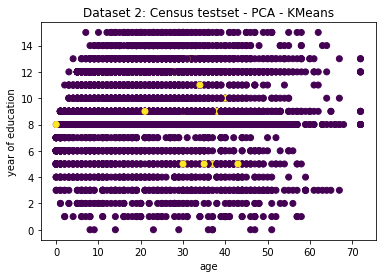

In [117]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()

In [118]:
# Evaluate quality of clusters
print('test set')
score = silhouette_score(x_test_transform, y_test_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_km2)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.9701596335751592
Adjusted Mutual Information (AMI) score:  0.0001979995345292532


## KMeans n=? 
### change best_n_clusters!  determined from graph

In [119]:
best_n_clusters = 4
km = KMeans(n_clusters = best_n_clusters, random_state = my_random_state)


tic = time.perf_counter() 
km.fit(x_train_transform)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print(km.cluster_centers_)
print(km.labels_)
print(km.inertia_)
print(km.n_iter_)

training time 0.1664986000000681 seconds

[[ 1.42466306e-01 -3.06370903e-02]
 [-8.40181933e-03  6.80842331e-04]
 [ 5.87459096e-01 -5.00777139e-02]
 [ 1.06184578e+00  1.58204758e-01]]
[1 1 1 ... 1 1 1]
16.890098040387205
12


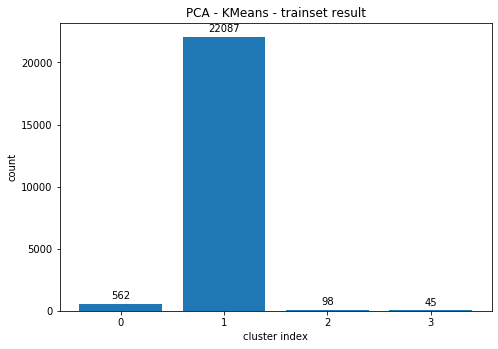

In [120]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in km.labels_:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts)
plt.title(f'{thisDR} - {thisClust} - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_train.png')

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [121]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km.inertia_)
score = silhouette_score(x_train_transform, km.labels_)
print('Silhouette score: ', score)
# ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), x_train_km)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), km.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  16.890098040387205
Silhouette score:  0.9136856687010355
Adjusted Mutual Information (AMI) score:  3.2274518780358003e-05


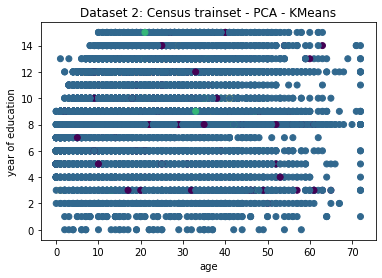

In [122]:

plt.scatter(x_train[:,0],x_train[:,4], c=km.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [123]:


tic = time.perf_counter() 
y_test_predict = km.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.002683100000012928 seconds



array([1, 1, 1, ..., 1, 1, 1])

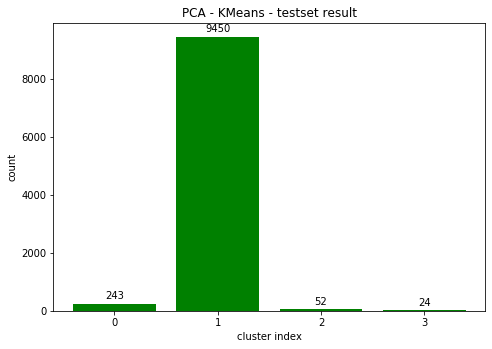

In [124]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title(f'{thisDR} - {thisClust} - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [125]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.9122303540909898
Adjusted Mutual Information (AMI) score:  -0.00013897678727298846


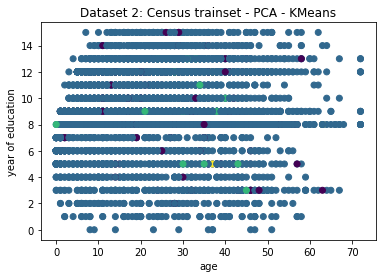

In [126]:

plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test.png')
plt.show()

# 3. after dimensional reduction: Expectation Maximization (EM)

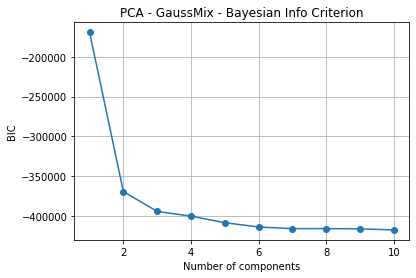

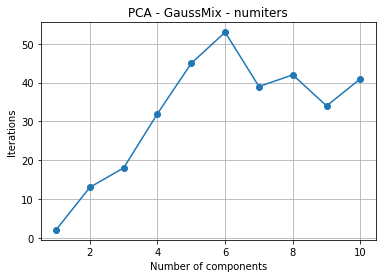

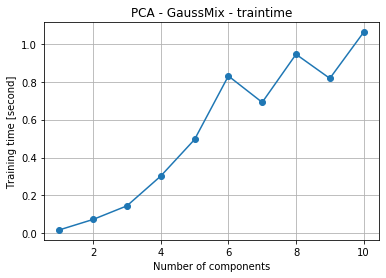

In [127]:
thisClust = 'GaussMix'
#  Find the optimal number of components using BIC
n_components_grid = np.arange(1, 11)
# bic = np.zeros(n_components_grid.size)
bic = []
numiters = []
traintime = []

# for idx, n_components in enumerate(n_components_grid):
for n_components in n_components_grid:
    gm = GaussianMixture(n_components=n_components, random_state=my_random_state)
    
    tic = time.perf_counter() 
    gm.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    
    numiters.append(gm.n_iter_)
    bic.append(gm.bic(x_train_transform))
#     bic[idx] = gm.bic(x_train)
print()


# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid, bic, marker='o')
# plt.xticks(k_grid)
plt.title(f'{thisDR} - {thisClust} - Bayesian Info Criterion')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_bic.png')

# plot
plt.figure()
plt.plot(n_components_grid, numiters, marker='o')
plt.title(f'{thisDR} - {thisClust} - numiters')
plt.xlabel('Number of components')
plt.ylabel('Iterations')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(n_components_grid, traintime, marker='o')
plt.title(f'{thisDR} - {thisClust} - traintime')
plt.xlabel('Number of components')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_traintime.png')
plt.show()

## Gaussian Mixture best_n_component = 2
### compare with original labeling

In [128]:
# the best n_clusters determined to be 4 (same as the original labeling)

best_n_component = 2
gm2 = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm2.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict2 = gm2.predict(x_train_transform)
y_train_predict2

training time 0.09177349999981743 seconds



array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [129]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

In [130]:
y_train_predict2.tolist().count(1)

2823

[[15687  1656]
 [ 4282  1167]]
Prediction accuracy on train set: 0.7394699894699894


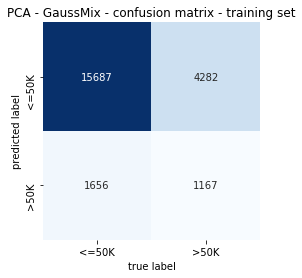

In [131]:
species = ['<=50K','>50K']

# y_train_gm2 = []
# for l in y_train_predict2:
#     y_train_gm2.append(species[l])

# y_train_predict2 = -1*(y_train_predict2 - 1) # inverse 0 & 1 if necessary

train_confmat_gm2 = confusion_matrix(y_train, y_train_predict2)
train_accu_gm2 = accuracy_score(y_train, y_train_predict2)
print(train_confmat_gm2)
print(f"Prediction accuracy on train set: {train_accu_gm2}")


# species.reverse() # for plotting
sns.heatmap(train_confmat_gm2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - training set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_train.png')

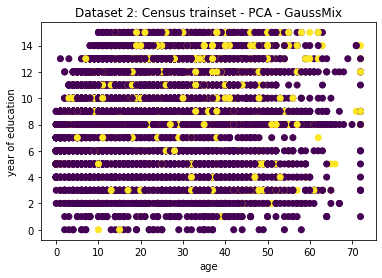

In [132]:

plt.scatter(x_train[:,0],x_train[:,4], c=y_train_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

In [133]:
# Evaluate quality of clusters
print('training set')
# print('Inertia: ', km2.inertia_)
score = silhouette_score(x_train_transform, y_train_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict2)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Silhouette score:  0.7663285769308039
Adjusted Mutual Information (AMI) score:  0.02295806846373733


In [134]:

tic = time.perf_counter() 
y_test_predict2 = gm2.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict2

testing time 0.0015844999998080311 seconds



array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [135]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

[[6702  675]
 [1862  530]]
Prediction accuracy on train set: 0.7403009519909919


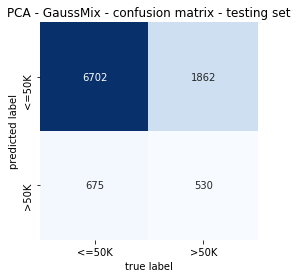

In [136]:
species = ['<=50K','>50K']

# y_test_predict2 = -1*(y_test_predict2 - 1) # inverse 0 & 1 if necessary

test_confmat_gm2 = confusion_matrix(y_test, y_test_predict2)
test_accu_gm2 = accuracy_score(y_test, y_test_predict2)
print(test_confmat_gm2)
print(f"Prediction accuracy on train set: {test_accu_gm2}")


# species.reverse() # for plotting
sns.heatmap(test_confmat_gm2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - testing set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_test.png')

In [137]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict2)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.7673061273753339
Adjusted Mutual Information (AMI) score:  0.02778631310892237


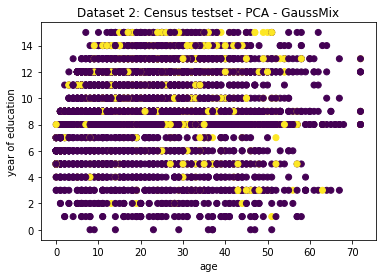

In [138]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()



## Gaussian Mixture best_n_component = ?
### change best_n_component!  determined from graph

In [139]:
best_n_component = 4
gm = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict = gm.predict(x_train_transform)
y_train_predict

training time 0.3281676999999945 seconds



array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [140]:
# Evaluate quality of clusters
print('training set')
score = silhouette_score(x_train_transform, y_train_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)
# print(f"Prediction accuracy on train set: {accuracy_score(le.inverse_transform(y_train),y_train_predict)}")

training set
Silhouette score:  0.6068477292978617
Adjusted Mutual Information (AMI) score:  0.02103826954904118


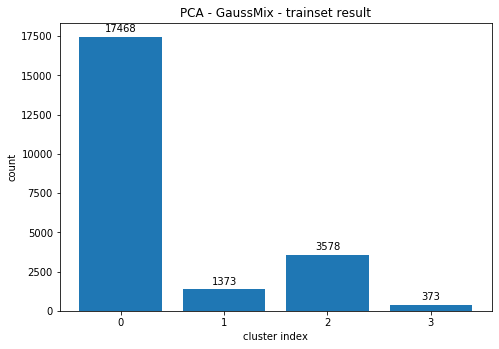

In [141]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for yp in y_train_predict:
    counts[yp] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices,counts)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.title(f'{thisDR} - {thisClust} - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_train.png')
plt.show()

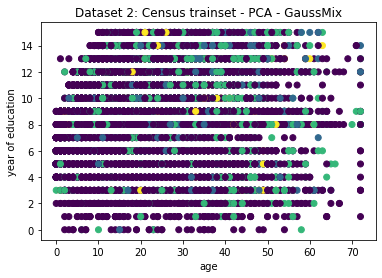

In [142]:
plt.scatter(x_train[:,0],x_train[:,4], c=y_train_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [143]:


tic = time.perf_counter() 
y_test_predict = gm.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.0027369999997972627 seconds



array([2, 1, 2, ..., 0, 2, 2], dtype=int64)

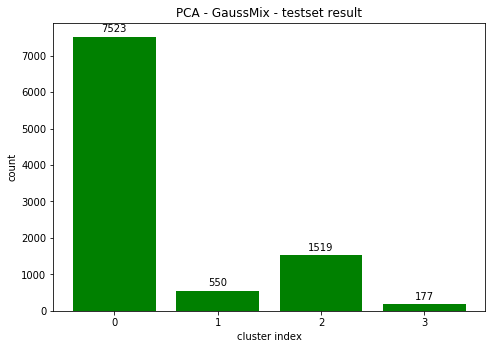

In [144]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title(f'{thisDR} - {thisClust} - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [145]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.5988588159811697
Adjusted Mutual Information (AMI) score:  0.02094905183125619


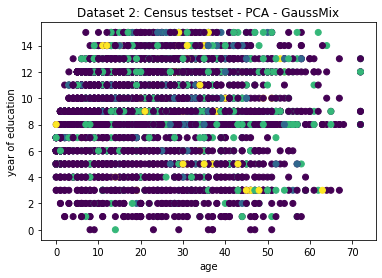

In [146]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test.png')
plt.show()